## Graph data structure
## Copyright: Jagadeesh Vasudevamurthy
## filename:graph.ipynb¶

# All import here

In [1]:
import sys # For getting Python Version
import os
import enum # For enum
import math  # for infinity
from graphviz import Source
print("Version of Python I am using is", sys.version)

Version of Python I am using is 3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)]


# Final Test Bench here

# Graph input and output directory setup
# YOU MUST CHANGE 2 lines below

In [2]:
inputFileBase = "C:\\Users\\ruchi\\Coursework\\PSA\\Assignments\\Final\\100\\output\\"
outputFileBase = "C:\\Users\\ruchi\\Coursework\\PSA\\Assignments\\Final\\100\\output\\" 

In [3]:
def read_dot_file(f:'string')->'dot_graph':
    filename = outputFileBase + f + ".dot"
    print(filename)
    with open(filename) as f1:
        dot_graph = f1.read()
    print(dot_graph)
    return(dot_graph)

# YOU WRITE CODE BELOW

# GraphExam
# You write code in this cell

In [4]:
############################################################
# Graph Exam
###########################################################
class GraphExam:
  def __init__(
        self,
        n:"num verices",
        g: "graph",
        graph_name: "string",
        a: "python list of tuples (from, to, weight)",
        min_sum:'list of size 1', #Must compute always
        min_prod:'list of size 1', #compute only if all weights > 0 and n <= LIMIT
        ws:'List of all path weights used for computing min MST sum',
        wp:'List of all path weights used for computing min MST product',
        show:'bool' #Must show SUM graph if show = true
    ):
    ## NOTHING CAN BE CHANGED BELOW
    self._n = n # no of edges
    self._g = g
    self._graph_name = graph_name
    self._a = a #python list of tuples (from, to, weight)
    self._min_sum = min_sum
    self._min_prod = min_prod
    self._ws = ws #path used for min sum weight 
    self._wp = wp #path used for min prod weight 
    self._show = show
    #DO NOT BUILD GRAPH or COMPUTE PRODUCT if self._n > self._MAX

    self._MAX = 100
   
    if (self._n <= self._MAX):
        self._build_graph(a)    
    else:
        self._show = False
        
    if (self._show):
      input_graph_file = outputFileBase + self._graph_name + ".dot"
      self._g.write_dot(input_graph_file) #You already have this routine
      print("graph is at:",input_graph_file)
        
    output_graph_file = outputFileBase + self._graph_name + "out.dot"
    if (self._n <= self._MAX):
        #you have the graph. Get all edges from the graph
        edges = self._build_edge_data_struture_from_graph()
    else:
        #You never built the graph
        edges = self._a
       
    #Compute min_sum always
    #compute min_product only if n <= LIMIT and w > 0
    #Must output graph as a dot file if only show=True
    self._compute_min_sum_min_prod(edges,output_graph_file)
 
  # Time Complexity = O(V)
  # Space Complexity = O(1)
  def _build_graph(self, a:"python list of tuples (from, to, weight)"):
    for ftw in a:
      tf = str(ftw[0])
      tt = str(ftw[1])
      tw = float(ftw[2])
      n1 = self._g._data_interface.insert(Data(tf))
      n2 = self._g._data_interface.insert(Data(tt))
      self._g.add_edge(n1, n2, tw)

  # Time Complexity = O(E)
  # Space Complexity = O(1)
  def _build_graph_nodes(self, edges):
    final_edges = edges
    if (not (self._n <= self._MAX)):
      final_edges = self._build_edge_data_struture_from_a()
      for ftw in self._a:
        tf = str(ftw[0])
        tt = str(ftw[1])
        tw = float(ftw[2])
        n1 = self._g._data_interface.insert(Data(tf))
        n2 = self._g._data_interface.insert(Data(tt))      
    return final_edges     

  def _get_mst_index(self, node):
    return self._g._data_interface.find_by_name(node)
  
  def _get_mst_parent_index(self, mst, index):
    while(mst[index] >= 0):
      index = mst[index]
    return index
  
  def _get_mst_cluster_childern(self, mst, parent):
    leaves = []
    for i in range(len(mst)):
      parent_index = self._get_mst_parent_index(mst, i)
      if (parent_index == parent):
        leaves.append(i)
    return leaves
      

  def _has_positive_edges(self):
    for i in range(len(self._a)):
      if (self._a[i][2] <= 0):
        return False
    return True

  
  def _compute_product(self, sorted_edges, num_nodes, ms_egdes):
    if (self._has_positive_edges() and self._n <= self._MAX):
      min_prod = 1
      for edges in ms_egdes:
        from_node, to_node, weight = edges
        self._wp.append(weight)
        min_prod *= weight
      self._min_prod[0] = min_prod

  # Time Complexity = O(E LogE)
  # Space Complexity = O(E)  
  def _compute_min_sum_min_prod(self,edges:"python list of tuples (from, to, weight)", out_file:'string'):
    # if show is True, you must write dot file of output
    # DO NOT COMPUTE PRODUCT if self._n > self._MAX
    # DO NOT COMPUTE PRODUCT if weight <= 0
    # Test bench will fail if you dont follow
    input_edges = self._build_graph_nodes(edges)

    num_nodes = len(self._g._data_interface)

    mst = [-1 for i in range(num_nodes)]

    sorted_edges = sorted(input_edges, key=lambda x: x[2])

    ms_egdes = []

    # for i in range(len(mst)):
    #   print("mst", i, self._g._data_interface[i])


    for i in range(len(sorted_edges)):
      if (len(ms_egdes) == num_nodes - 1):
        break

      from_node, to_node, weight = sorted_edges[i]
      # print(i, sorted_edges[i])

      from_node_index = self._get_mst_index(from_node)
      to_node_index = self._get_mst_index(to_node)

      from_node_parent_index = self._get_mst_parent_index(mst, from_node_index)
      to_node_parent_index = self._get_mst_parent_index(mst, to_node_index)
    
      # print([(self._g._data_interface[i] + " : " + str(mst[i])) for i in range(len(mst))])
      # print("from", from_node, from_node_index, from_node_parent_index)
      # print("to", to_node, to_node_index, to_node_parent_index)
      
      if (from_node_parent_index != to_node_parent_index):
        if (from_node_index == from_node_parent_index and to_node_index == to_node_parent_index):
          #connect org - first connection
          to_cluster_node_indexes = self._get_mst_cluster_childern(mst, to_node_parent_index)
          # print("to_cluster_node_indexes", to_cluster_node_indexes)
          mst[from_node_parent_index] -= len(to_cluster_node_indexes)
          for i in to_cluster_node_indexes:
            mst[i] = from_node_parent_index
          ms_egdes.append((from_node, to_node, weight))
        elif (from_node_index == from_node_parent_index and to_node_index != to_node_parent_index):
          # connect from_node to org
          mst[to_node_parent_index] -= 1
          mst[from_node_index] = to_node_parent_index
          ms_egdes.append((from_node, to_node, weight))
        elif (from_node_index != from_node_parent_index and to_node_index == to_node_parent_index):
          # connect to_node to org
          mst[from_node_parent_index] -= 1
          mst[to_node_index] = from_node_parent_index
          ms_egdes.append((from_node, to_node, weight))
        else:
          # connect from_node to to_node
          to_cluster_node_indexes = self._get_mst_cluster_childern(mst, to_node_parent_index)
          # print("to_cluster_node_indexes", to_cluster_node_indexes)
          mst[from_node_parent_index] -= len(to_cluster_node_indexes)
          for i in to_cluster_node_indexes:
            mst[i] = from_node_parent_index
          ms_egdes.append((from_node, to_node, weight))

      
      # print("ms_edges", ms_egdes)
      # print()

    # print("mst", mst)
    # print("ms_egdes", ms_egdes)

    self._min_sum[0] = 0
    for edges in ms_egdes:
      from_node, to_node, weight = edges
      self._ws.append(weight)
      self._min_sum[0] += weight


    self._compute_product(sorted_edges, num_nodes, ms_egdes)


    if (self._show):
      graph_output = Graph(GraphType.WEIGHTED_UNDIRECTED)
      for ftw in ms_egdes:
        tf = str(ftw[0])
        tt = str(ftw[1])
        tw = float(ftw[2])
        n1 = graph_output._data_interface.insert(Data(tf))
        n2 = graph_output._data_interface.insert(Data(tt))
        graph_output.add_edge(n1, n2, tw)
      graph_output.write_dot(out_file)
      print("graph is at:",out_file)

  def _get_all_graph_edges(self)->"python list of tuples (from, to, weight)":
    list_of_nodes = self._g.list_of_nodes()
    edge_list = []
    visited = {}
    for from_node in list_of_nodes:
      from_node_num = from_node.get_num()
      from_node_real_data = self._g.get_real_name(from_node_num)
      visited[from_node_num] = set()
      for egde in from_node.all_fanout_edges_of_a_node():
       to_node = egde.get_other_node()
       to_node_num = to_node.get_num()
       if self._g.is_undirected_graph() and to_node_num in visited and from_node_num in visited[to_node_num]:
        continue
       visited[from_node_num].add(to_node_num)
       to_node_real_data = self._g.get_real_name(to_node_num)
       weight = egde.get_weight()
       edge_list.append((from_node_real_data, to_node_real_data, weight))
    return edge_list

  # Time Complexity = O(E V)
  # Space Complexity = O(V)
  def _build_edge_data_struture_from_graph(self)->"python list (from, to, weight)":
    graph_edges = self._get_all_graph_edges()    
    return graph_edges
  
  def _build_edge_data_struture_from_a(self)->"python list (from, to, weight)":
    graph_edges = []
    for i in self._a:
      from_node = str(i[0])
      to_node = str(i[1])
      weight = float(i[2])
      graph_edges.append((from_node, to_node, weight))
    return graph_edges
 


## NOTHING CAN BE CHANGED BELOW

# Write Graph as a dot file

In [5]:
############################################################
# GraphDot.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2024
###########################################################

############################################################
# YOU WRITE CODE IN THIS FILE
###########################################################

class GraphDot:
    def __init__(self, g, f):
        self._g = g  # Handle to graph
        self._f = f  # File where you write graph in dot format
        self._of = open(self._f, "w")
        self._write_dot()
        self._of.close()

    ############################################################
    # Write code: _write_dot
    # Use as many private functions and prvate data you want
    ###########################################################
    def _write_dot(self):
        self._of.write("## Jagadeesh Vasudevamurthy ####\n")
        self._of.write("digraph g {\n")
        t = self._g.get_graph_type()
        if t == GraphType.UNDIRECTED or t == GraphType.WEIGHTED_UNDIRECTED:
            self._of.write("\t edge [dir=none, color=red]")
        else:
            self._of.write("edge [color=red]")
        self._of.write("\n")
        nodelist = self._g.list_of_nodes()
        # Time complexity: THETA(V + E)
        for n in nodelist:
            p1 = n.get_num()
            rp1 = self._g.get_real_name(p1)
            fanouts_of_n_edges = n.all_fanout_edges_of_a_node()
            for nf in fanouts_of_n_edges:
                p2 = nf.get_num()
                rp2 = self._g.get_real_name(p2)
                w = nf.get_weight()
                s = ""
                if (
                    t == GraphType.WEIGHTED_UNDIRECTED
                    or t == GraphType.WEIGHTED_DIRECTED
                ):
                    if t == GraphType.WEIGHTED_DIRECTED or (p1 < p2):
                        s = s + "   " + rp1 + " -> " + rp2 + " [label = " + str(w) + "]"
                elif t == GraphType.DIRECTED or (p1 < p2):
                    s = s + "   " + rp1 + " -> " + rp2
                if s != "":
                    self._of.write("\t")
                    self._of.write(s)
                    self._of.write("\n")
        self._of.write("}")


## Graph Types

In [6]:
class GraphType(enum.Enum): 
    NONE = 0
    UNDIRECTED = 1
    DIRECTED = 2
    WEIGHTED_UNDIRECTED = 3
    WEIGHTED_DIRECTED  = 4

# Graph Interface with user data

In [7]:
###########################################################
# GraphInterface.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2024
###########################################################

############################################################
# You can have any Data. 
# You must writethe routines below 
#   __init__
#   -get_key
#   __str__
#   get_real_name -- name for printing
#   __hash__
#   __lt__
###########################################################
class Data:
    def __init__(self, n: "string"):
        self._name = n  ### _name is used as key for this project
        self.age = 100  ## To show you can have anything,

    def _get_key(self) -> "string":
        return self._name

    def __str__(self) -> "string":
        return self._name

    def get_real_name(self) -> "string":
        return self._name

    #'''
    def __hash__(self)->'int':
        k = self._get_key()
        t = hash(k)
        return t
    #'''
    def __lt__(self, other: "Data") -> "bool":
      if not isinstance(other, type(self)):
            assert False
      n1 = self._get_key()
      n2 = other._get_key()
      return (n1 < n2)

    ############################################################
    # Do not change anything below
    ###########################################################
    
    #############################
    # Overload ==
    # (a == b) == !(a < b) && !(b < a)
    #############################
    def __eq__(self, b: "Data") -> "bool":
        return not (self < b) and not (b < self)
    
    #############################
    # Overload >
    # (a > b) = (b < a)
    #############################
    def __gt__(self, b: "Data") -> "bool":
        return b < self

    #############################
    # Overload <=
    # (a <= b) = !(b < a)
    #############################
    def __le__(self, b: "Data") -> "bool":
        return not (b < self)

    #############################
    # Overload >=
    # (a >= b) = !(a < b)
    #############################
    def __ge__(self, b: "Data") -> "bool":
        return not (self < b)

    #############################
    # Overload !=
    # (a != b) == !(a == b)
    #############################
    def __ne__(self, b: "Data") -> "bool":
        return not (self == b)
  
 ############################################################
# GraphInterface
###########################################################
class GraphInterface: 
  def __init__(self):
    self._index = 0
    self._dict = {} # Key is item UDT: Value is index (0 to n-1)
    self._list = [] # Given number between 0 to n-1 get Data in O(1) time

  def __len__(self)->'int':
    l =len(self._dict)
    assert(l == self._index)
    return l

  ############################################################
  # If Data d is already there get a unique number
  # If Data d is not there, return -1
  ###########################################################
  def find(self, d:'Data')->'int':
    ##calls DATA  def __hash__(self)->'int':
    ##if you don't write hash
    ## TypeError: unhashable type: 'Data'
    if (d in self._dict):
      n = self._dict.get(d) #Key is int  Value is the 'DATA'  THETA(1)
      assert(n >= 0 and n < self._index)
      return n
    return -1

  ############################################################
  # If Data d is already there get a unique number
  # If Data d is not there, return -1
  ###########################################################
  def find_by_name(self, s:'string')->'int':
    d = Data(s)
    if (d in self._dict):
      n = self._dict.get(d) #Key is int  Value is the 'data'  THETA(1)
      assert(n >= 0 and n < self._index)
      return n
    return -1

  ############################################################
  # If Data d is already there gives a unique number
  # If Data d is not there, stores the data in a dict and returns unique int
  ###########################################################
  def insert(self, d:'Data')->'int':
    n = self.find(d)
    if (n == -1):
      #Not in the dict. Add to dict and to list. Note everything is pointer 
      self._dict[d] = self._index #Key is int  Value is the d  THETA(1)
      self._list.append(d)
      n = self._index
      self._index = self._index + 1
    return n

  
  ############################################################
  # Given an unique int gives user data in THETA(1) time
  ###########################################################
  def __getitem__(self, n:'int')->'string':
    assert(n >= 0 and n < self._index)
    return self._list[n].get_real_name()
 
############################################################
# start up
###########################################################
if __name__ == "__main__":
   g = GraphInterface()

## Graph class

In [8]:
############################################################
# Graph.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2024
###########################################################

############################################################
# NOTHING CAN BE CHANGED IN THIS FILE
###########################################################

############################################################
# All imports
###########################################################
import collections
import math  # for infinity


############################################################
# Edge
# Name less data structure
# node number is guaranteed to be int from 0 to n-1
###########################################################
class Edge:
    def __init__(self, n: "Node", weight: "float"):
        self._other_node = n  # _other node
        self._weight = weight  # _weight is float

    ############################################################
    # All Public routines. YOU SHOULD ONLY CALL THESE ROUTINES
    ###########################################################
    def get_other_node(self) ->'Node':
        return self._other_node

    def get_num(self) -> "int":
        return self.get_other_node().get_num()

    def get_weight(self) -> "float":
        return self._weight

    def change_weight(self, w: "float") -> "None":
        self._weight = w

############################################################
# Node
# Name less data structure
# node num is guaranteed to be int from 0 to n-1
###########################################################
class Node:
    def __init__(self, n: "int"):
        self._num = n 
        self._fanins = {}  # dict of fanins of Node. Key is edge other node num int, Value is Edge
        self._fanouts = {} # dict of fanouts of Node. Key is edge other node num int, Value is Edge

    #we must write hash function as we are inserting all nodes in a dictonary of graph
    # self._dict = {}  #all nodes are in a dictionary
    # n = Node(100)
    # self._add_node(n)

    def _get_key(self)->'int':
        return self._num

    def __hash__(self)->'int':
        k = self._get_key()
        t = hash(k)
        return t

    ############################################################
    # All Public routines. YOU SHOULD ONLY CALL THESE ROUTINES
    ###########################################################
    def get_num(self) -> "int":
        return self._num

    def add_fan_out(self, e: "Edge") -> "None":
        key = e.get_num()
        self._fanouts[key] = e  #key is int. Value is edge

    def add_fan_in(self, e: "Edge") -> "None":
        key = e.get_num()
        self._fanins[key] = e #key is int. Value is edge

    def num_fan_outs(self) -> "int":
        return len(self._fanouts)

    def num_fan_ins(self) -> "int":
        return len(self._fanins)

    def all_fanout_edges_of_a_node(self) -> "list of fanout edges":
        # l will have edge {othernode, weight}
        l = list(self._fanouts.values())
        return l

    def all_fanin_edges_of_a_node(self) -> "list of fanin edges":
        # l will have edge {othernode, weight}
        l = list(self._fanins.values())
        return l
 
    def node_has_fanout_edge(self, e: "Edge") -> "Edge or None":
        aedge = self._fanouts.get(e.get_num())  # key is int
        if aedge:
            return aedge
        else:
            return None

    def node_has_fanin_edge(self, e: "Edge") -> "Edge or None":
        aedge = self._fanins.get(e.get_num())  # key is int
        if aedge:
            return aedge
        else:
            return None

    #get from_node to_node weight
    #self is from_node
    def get_from_node_2_to_node_weight(self, tonode:"Node", must_be_there:'bool') ->'float':
      e = Edge(tonode,0) #create a dummy edge of {tonode,0}
      se = self.node_has_fanout_edge(e) #THETA(1)
      if (must_be_there):
        assert(se) #Stored edge must be there
        return se.get_weight()
      else:
        return math.inf

class Graph:
    def __init__(self,graphtype: "GraphType"):
        self._numE = 0  # Number of edges
        self._type = graphtype  # Graph type
        self._dict = {}  #all nodes are in a dictionary
        # node num is int from 0 to n-1. 
        # Value is the Node. 
        # calls the __hash__ of node
        self._data_interface = GraphInterface()
        
    ############################################################
    # All Public routines. YOU SHOULD ONLY CALL THESE ROUTINES
    ###########################################################
    def get_numV(self) -> "int":
        n = len(self._dict)
        return n

    def get_numE(self) -> "int":
        return self._numE

    def is_directed_graph(self) -> "bool":
        if self._type == GraphType.DIRECTED:
            return True
        if self._type == GraphType.WEIGHTED_DIRECTED:
            return True
        return False

    def is_undirected_graph(self) -> "bool":
        return not (self.is_directed_graph())

    def is_weighted_graph(self) -> "bool":
        if self._type == GraphType.WEIGHTED_UNDIRECTED:
            return True
        if self._type == GraphType.WEIGHTED_DIRECTED:
            return True
        return False

    def get_graph_type(self) -> "GraphType":
        return self._type

    def get_graph_type_as_string(self) -> "string":
        t = self.get_graph_type()
        if t == GraphType.UNDIRECTED:
            return "UNDIRECTED GRAPH"
        if t == GraphType.DIRECTED:
            return "DIRECTED GRAPH"
        if t == GraphType.WEIGHTED_UNDIRECTED:
            return "WEIGHTED_UNDIRECTED GRAPH"
        if t == GraphType.WEIGHTED_DIRECTED:
            return "WEIGHTED_DIRECTED GRAPH"
        return "NONE"

    def list_of_nodes(self) -> "list of nodes":
        # Key is int from 0 to n-1. 
        # Value is the Node. 
        l = list(self._dict.values()) # we get list of all nodes
        return l

    def build_node(self, num:'int') -> "Node":
        n = Node(num)
        return n
    
    def build_node_and_to_graph(self, num:'int') -> "Node":
        n = Node(num)
        #calls __hash__ of node
        self._add_node(n)

    def has_node(self,nodenum:'int') -> "bool":
        if nodenum in self._dict: #key is int
          return True
        return False

    def get_node(self,node:'Node')->'Node':
      if (self.has_node(node.get_num())):
        n = self._dict[node.get_num()]
        assert(n)
        return n
      return None

    def add_edge(self,f:'int', t:'int', w:'float'):
        f = Node(f)
        t = Node(t)
        self._add_edge(f,t,w)

    def get_real_name(self,i:'int')->'string':
        s = self._data_interface[i]
        return s

    def dump_as_list(self):
      n = self.get_numV()
      a = []
      for i in range(n):
        a.append([])
      all_nodes = self.list_of_nodes()
      for node in all_nodes:
        #print(a)
        n = node.get_num()
        f = node.num_fan_outs()
        if (f):
          fanouts_of_n_edges = node.all_fanout_edges_of_a_node()
          for nf in fanouts_of_n_edges:
            d = nf.get_num()
            w = nf.get_weight()
            l = [d,w]
            a[n].append(l)

      print("\tg = [")
      for alist in a:
            print("\t\t",alist,",")
      print("\t]")

    def dump(self, name):
        print("------------", name, "------------ ")
        print(self.get_graph_type())
        print("Num Vertices =", self.get_numV())
        print("Num Edges    =", self._numE)
        numedge = 0
        all_nodes = self.list_of_nodes()
        for node in all_nodes:
            #node._num = int 0 to n-1
            #node._fanouts = {}
            n = node.get_num()
            rn = self.get_real_name(n)
            print(rn, "Fanouts: ", end="")
            f = node.num_fan_outs()
            if f == 0:
                print("NONE")
            else:
                fanouts_of_n_edges = node.all_fanout_edges_of_a_node()
                j = 0
                for nf in fanouts_of_n_edges:
                    numedge = numedge + 1
                    fnum = nf.get_num()
                    rd = self.get_real_name(fnum)
                    if j < f - 1:
                        print(rd, ",", sep="", end="")
                    else:
                        print(rd)
                    j = j + 1
            print(rn, "Fanins : ", end="")
            f = node.num_fan_ins()
            if f == 0:
                print("NONE")
            else:
                fanins_of_n_edges = node.all_fanin_edges_of_a_node()
                j = 0
                for nf in fanins_of_n_edges:
                    numedge = numedge + 1
                    fnum = nf.get_num()
                    rd = self.get_real_name(fnum)
                    if j < f - 1:
                        print(rd, ",", sep="", end="")
                    else:
                        print(rd)
                    j = j + 1
        assert numedge/2 == self._numE

    ##########################################################
    # Nothing can be changed
    # TIME: THETA(V + E)
    # SPACE: THETA(V)
    ##########################################################
    def assert_dfs_passed(self, has_loop: "bool", dfs_order: "list of nodes"):
        t = self.get_graph_type()
        if (t == GraphType.UNDIRECTED) or (t == GraphType.WEIGHTED_UNDIRECTED):
            return
        if has_loop == False:
            set_of_visited_nodes = set()
            for n in dfs_order:
                ## Go on fanins of node
                fanins_of_n_edges = n.all_fanin_edges_of_a_node()
                for nfanin in fanins_of_n_edges:
                    nf = nfanin.get_other_node()
                    must_be_there = nf in set_of_visited_nodes  # find in THETA(1)
                    assert must_be_there
                set_of_visited_nodes.add(n)  # add in THETA(1)
            # All nodes must be visited
            assert len(set_of_visited_nodes) == self.get_numV()
            print("DFS ASSERT PASSED")

    ############################################################
    # All Private routines. YOU SHOULD NOT CALL THESE ROUTINES
    ###########################################################
    def _add_node(self, n:'Node')->"Node":
        storedn = self.get_node(n)
        if (storedn):
          return storedn
        key = n.get_num()
        n = Node(key) #build a node. This is NOT in graph
        self._dict[key] = n # Key is unique number int (0 to n-1) 
        return n

    def _add_an_edge(self,f:'Node', t:'Node', fanout:'bool', w:'float'):
        f = self._add_node(f)
        t = self._add_node(t)
        if (fanout):
          e = f.node_has_fanout_edge(t)
          if (e):
            ew = e.get_weight()
            if (w < ew):
              e.change_weight(w)
          else:
            #first time
            e = Edge(t, w)
            self._numE = self._numE + 1
            f.add_fan_out(e)
        else:
          e = f.node_has_fanin_edge(t)
          if (e):
            ew = e.get_weight()
            if (w < ew):
              e.change_weight(w)
          else:
            #first time
            e = Edge(t, w)
            f.add_fan_in(e)

    def _add_edge(self,f:'Node', t:'Node', w:'float'):
        self._add_an_edge(f,t,True,w) #fanout
        self._add_an_edge(t,f,False,w) #fanin
        if (self._type == GraphType.UNDIRECTED) or (self._type == GraphType.WEIGHTED_UNDIRECTED):
          self._add_an_edge(t,f,True,w) #fanout
          self._add_an_edge(f,t,False,w) #fanin

    ############################################################
    ## All the routines written by students
    ##########################################################
    def write_dot(self, f):
        b = GraphDot(self, f)


# Exam Tester. Will be replaced after exam

In [9]:
class GraphExamTest:
    def __init__(self):
        self._show = False  # Change to True for debugging
        self._test()

    def _test1(self,name:'string', a:'python list of tuples (from, to, weight)',graphtype:'graph type',show:'bool'):
        if (show):
          print("Building graph", name)
        n = len(a)
        g = Graph(graphtype)
        min_sum = [0]
        min_prod = [-1]
        ws = []
        wp = []
        b = GraphExam(n,g,name,a,min_sum,min_prod,ws,wp,show) 
        tsum = 0
        for e in ws:
          tsum = tsum + e
        assert(tsum == min_sum[0])
        if (min_prod[0] != -1):
            #make sure answer is right from sum
            tp = 1
            for e in ws:
              tp = tp * e
            assert(tp == min_prod[0])
            #make sure answer is right from prod
            p = 1
            for e in wp:
              p = p * e
            assert(p == min_prod[0])
        if (show):
          print("mst sum =", min_sum[0])
          print("mst prod =", min_prod[0])
        return min_sum[0]

    def _generateB(self, a)->'python list of tuples (from, to, weight)':
      n = len(a)
      b = []
      for i in range(n):
        for j in range(i + 1, n):
          w = abs(a[i][0] - a[j][0]) + abs(a[i][1] - a[j][1])
          b.append((i, j, w))   
      return b
    
           
    def _test(self):
      show = True
      name = "ex1"
      a = [[0,0],[2,2],[3,10],[5,2],[7,0]]
      b = self._generateB(a)
      t = GraphType.WEIGHTED_UNDIRECTED
      self._test1(name,b,t,show)

# Graph tester

In [10]:
############################################################
# main
# YOU CANNOT CHANGE ANYTHING BELOW
###########################################################
def main():
    print(sys.version)
    t = GraphExamTest()
    print(
"This material is copyrighted and strictly for registered students only.\n"
"Unauthorized copying, sharing, or posting in any electronic or physical form\n"
"is a violation of USA copyright law. Violators may face fines up to $250,000\n"
"per infringement and imprisonment of up to 5 years."
)

    print("Can you rate me at: https://www.linkedin.com/in/jagadeesh-vasudevamurthy-6796591/")


# Main

# call Main

In [11]:
############################################################
# start up
###########################################################
if (__name__  == '__main__'):
      main()

3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)]
Building graph ex1
graph is at: C:\Users\ruchi\Coursework\PSA\Assignments\Final\100\output\ex1.dot
graph is at: C:\Users\ruchi\Coursework\PSA\Assignments\Final\100\output\ex1out.dot
mst sum = 20.0
mst prod = 432.0
This material is copyrighted and strictly for registered students only.
Unauthorized copying, sharing, or posting in any electronic or physical form
is a violation of USA copyright law. Violators may face fines up to $250,000
per infringement and imprisonment of up to 5 years.
Can you rate me at: https://www.linkedin.com/in/jagadeesh-vasudevamurthy-6796591/


# Uncomment Only Lines 

C:\Users\ruchi\Coursework\PSA\Assignments\Final\100\output\ex1.dot
## Jagadeesh Vasudevamurthy ####
digraph g {
	 edge [dir=none, color=red]
	   0 -> 1 [label = 4.0]
	   0 -> 2 [label = 13.0]
	   0 -> 3 [label = 7.0]
	   0 -> 4 [label = 7.0]
	   1 -> 2 [label = 9.0]
	   1 -> 3 [label = 3.0]
	   1 -> 4 [label = 7.0]
	   2 -> 3 [label = 10.0]
	   2 -> 4 [label = 14.0]
	   3 -> 4 [label = 4.0]
}


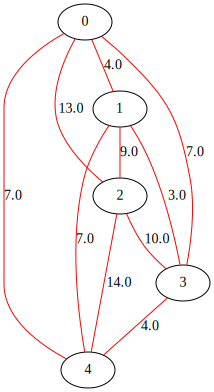

In [12]:
Source(read_dot_file("ex1"))

C:\Users\ruchi\Coursework\PSA\Assignments\Final\100\output\ex1out.dot
## Jagadeesh Vasudevamurthy ####
digraph g {
	 edge [dir=none, color=red]
	   1 -> 3 [label = 3.0]
	   1 -> 0 [label = 4.0]
	   1 -> 2 [label = 9.0]
	   3 -> 4 [label = 4.0]
}


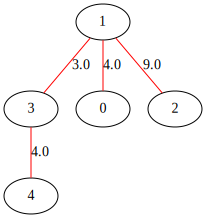

In [13]:
Source(read_dot_file("ex1out"))